In [1]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('data/Social_Network_Ads.csv')

In [3]:
print(df.isnull().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [4]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [5]:
X = df[['Age', 'EstimatedSalary']]  # We can include 'Age' as well if desired


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)


C:\Users\chang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


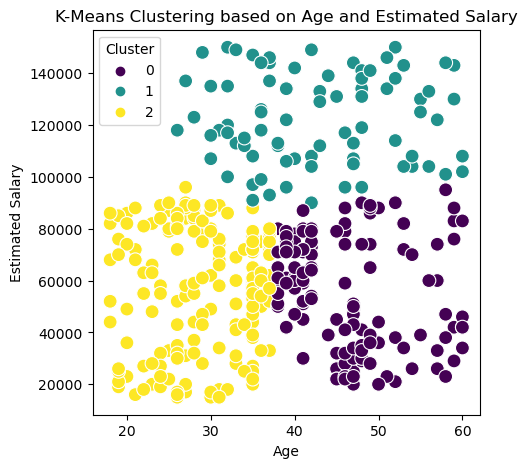

In [10]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Cluster', palette='viridis', data=df, s=100)
plt.title('K-Means Clustering based on Age and Estimated Salary')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend(title='Cluster')
plt.show()

In [11]:
print(df[['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Cluster']].sort_values(by='Cluster'))


      User ID  Gender  Age  EstimatedSalary  Cluster
399  15594041       0   49            36000        0
310  15717893       0   42            70000        0
122  15724423       0   40            75000        0
309  15652400       0   38            50000        0
124  15678168       0   41            51000        0
..        ...     ...  ...              ...      ...
140  15807909       1   19            85000        2
139  15741094       1   19            25000        2
138  15610403       0   28            59000        2
145  15746422       0   24            89000        2
199  15708228       1   35            22000        2

[400 rows x 5 columns]
